# 🚂 AI Rail Network Brain - Data Exploration Report

This notebook provides comprehensive visualization and statistical analysis of the Italian railway data:
- **Incident Analysis**: Types, severity, temporal patterns
- **Operation Analysis**: Delays, running times, stop times
- **Network Analysis**: Stations, routes, coverage
- **Heatmaps & Correlations**: Identifying patterns and relationships

In [3]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11

print("✅ Libraries loaded successfully!")

✅ Libraries loaded successfully!


In [4]:
# Load Processed Data
DATA_DIR = Path('../Data/Processed')
RAW_DIR = Path('../Data')

# Load enriched fault data
df_faults = pd.read_csv(DATA_DIR / 'fault_data_enriched.csv')
df_faults['date'] = pd.to_datetime(df_faults['date'])

# Load station data
df_stations = pd.read_csv(DATA_DIR / 'station_data_enriched.csv')

# Load mileage data
df_mileage = pd.read_csv(DATA_DIR / 'mileage_data_enriched.csv')

# Load operation data (sample for speed)
df_operations = pd.read_csv(DATA_DIR / 'operation_data_enriched.csv', nrows=100000)

print(f"📊 Data Loaded:")
print(f"  - Fault records: {len(df_faults):,}")
print(f"  - Stations: {len(df_stations):,}")
print(f"  - Route segments: {len(df_mileage):,}")
print(f"  - Operations (sample): {len(df_operations):,}")

📊 Data Loaded:
  - Fault records: 113
  - Stations: 2,975
  - Route segments: 12,173
  - Operations (sample): 100,000


---
## 📈 1. Dataset Overview & Statistics

In [5]:
# Fault Data Summary
print("=" * 60)
print("FAULT DATA SUMMARY")
print("=" * 60)
print(f"\n📅 Date Range: {df_faults['date'].min().date()} to {df_faults['date'].max().date()}")
print(f"📊 Total Incidents: {len(df_faults)}")
print(f"🚆 Unique Lines Affected: {df_faults['line_normalized'].nunique()}")

# Delay statistics
print(f"\n⏱️ Delay Duration Statistics:")
print(f"   Mean: {df_faults['delay_duration_min'].mean():.1f} minutes")
print(f"   Median: {df_faults['delay_duration_min'].median():.1f} minutes")
print(f"   Max: {df_faults['delay_duration_min'].max():.0f} minutes")
print(f"   Std Dev: {df_faults['delay_duration_min'].std():.1f} minutes")

# Severity statistics
print(f"\n🎯 Severity Score Statistics:")
print(f"   Mean: {df_faults['severity_score'].mean():.1f}")
print(f"   Median: {df_faults['severity_score'].median():.1f}")
print(f"   Max: {df_faults['severity_score'].max():.1f}")

# Resolution coverage
resolution_pct = df_faults['has_resolution'].mean() * 100
print(f"\n✅ Resolution Extraction Coverage: {resolution_pct:.1f}%")

FAULT DATA SUMMARY

📅 Date Range: 2024-09-20 to 2024-09-30
📊 Total Incidents: 113
🚆 Unique Lines Affected: 90

⏱️ Delay Duration Statistics:
   Mean: 43.1 minutes
   Median: 30.0 minutes
   Max: 225 minutes
   Std Dev: 36.6 minutes

🎯 Severity Score Statistics:
   Mean: 22.2
   Median: 23.3
   Max: 73.2

✅ Resolution Extraction Coverage: 87.6%


In [6]:
# Display fault data sample
print("\n📋 Fault Data Sample (key columns):")
display_cols = ['date', 'line_normalized', 'incident_type', 'delay_duration_min', 
                'severity_score', 'resolution_types', 'time_of_day']
df_faults[display_cols].head(10)


📋 Fault Data Sample (key columns):


,date,line_normalized,incident_type,delay_duration_min,severity_score,resolution_types,time_of_day
0,2024-09-20,Milan - Genoa,technical,40.0,16.69,SPEED_REGULATE,night
1,2024-09-20,High Speed Rome - Naples,technical,60.0,52.93,SPEED_REGULATE|GRADUAL_RECOVERY,evening_peak
2,2024-09-20,Genoa - Ventimiglia,trespasser,40.0,33.09,SPEED_REGULATE,evening_peak
3,2024-09-20,Venice - Milan,technical,30.0,29.67,SPEED_REGULATE,evening_peak
4,2024-09-20,Salerno - Naples via Monte del Vesuvio,technical,30.0,45.87,REROUTE|SPEED_REGULATE,evening_peak
5,2024-09-20,High Speed Rome - Florence,technical,50.0,31.11,REROUTE|SPEED_REGULATE|HOLD,midday
6,2024-09-20,High Speed Rome - Florence,trespasser,20.0,28.64,SPEED_REGULATE,midday
7,2024-09-20,Florence - Pisa,trespasser,50.0,27.71,CANCEL|SPEED_REGULATE,midday
8,2024-09-20,Palermo - Messina,technical,45.0,20.60,GRADUAL_RECOVERY,midday
9,2024-09-20,Conventional Florence - Bologna,technical,40.0,21.29,CANCEL|SPEED_REGULATE,midday


---
## 🔥 2. Incident Type Analysis

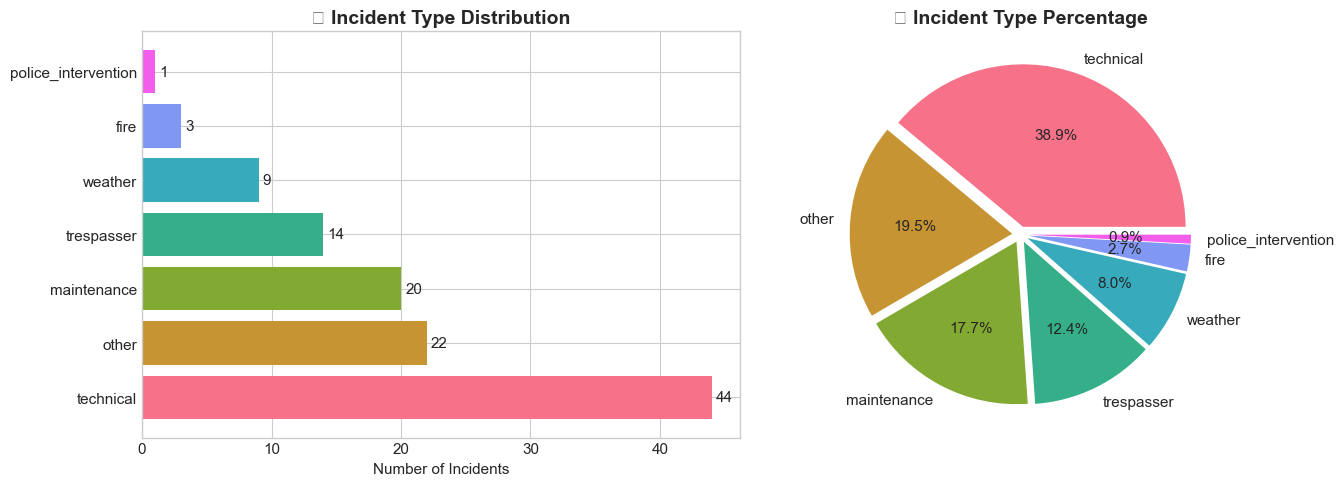


📊 Incident Type Breakdown:
  technical: 44 (38.9%)
  other: 22 (19.5%)
  maintenance: 20 (17.7%)
  trespasser: 14 (12.4%)
  weather: 9 (8.0%)
  fire: 3 (2.7%)
  police_intervention: 1 (0.9%)


In [14]:
# Incident Type Distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar chart
incident_counts = df_faults['incident_type'].value_counts()
colors = sns.color_palette('husl', len(incident_counts))
bars = axes[0].barh(incident_counts.index, incident_counts.values, color=colors)
axes[0].set_xlabel('Number of Incidents')
axes[0].set_title('📊 Incident Type Distribution', fontsize=14, fontweight='bold')
axes[0].bar_label(bars, padding=3)

# Pie chart
axes[1].pie(incident_counts.values, labels=incident_counts.index, autopct='%1.1f%%',
            colors=colors, explode=[0.05]*len(incident_counts))
axes[1].set_title('📈 Incident Type Percentage', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig(DATA_DIR / 'viz_incident_types.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n📊 Incident Type Breakdown:")
for itype, count in incident_counts.items():
    pct = count / len(df_faults) * 100
    print(f"  {itype}: {count} ({pct:.1f}%)")

### 🔍 Deep Dive: "Other" Incident Type Analysis

In [5]:
# Filter "other" incident type
other_incidents = df_faults[df_faults['incident_type'] == 'other'].copy()

print("=" * 70)
print("🔍 'OTHER' INCIDENT TYPE - DETAILED ANALYSIS")
print("=" * 70)

print(f"\n📊 Total 'Other' Incidents: {len(other_incidents):,}")
print(f"   Percentage of all incidents: {len(other_incidents)/len(df_faults)*100:.1f}%")

print(f"\n⏱️ Delay Statistics:")
print(f"   Mean: {other_incidents['delay_duration_min'].mean():.1f} minutes")
print(f"   Median: {other_incidents['delay_duration_min'].median():.1f} minutes")
print(f"   Max: {other_incidents['delay_duration_min'].max():.0f} minutes")
print(f"   Min: {other_incidents['delay_duration_min'].min():.0f} minutes")

print(f"\n🎯 Severity Statistics:")
print(f"   Mean: {other_incidents['severity_score'].mean():.1f}/100")
print(f"   Median: {other_incidents['severity_score'].median():.1f}/100")
print(f"   Max: {other_incidents['severity_score'].max():.1f}/100")

print(f"\n✅ Resolution Coverage: {other_incidents['has_resolution'].mean()*100:.1f}%")

print(f"\n🚆 Most Affected Lines (Top 10):")
if 'line_normalized' in other_incidents.columns:
    top_lines = other_incidents['line_normalized'].value_counts().head(10)
    for line, count in top_lines.items():
        print(f"   {line}: {count} incidents")

print(f"\n📅 Temporal Distribution:")
print(f"   Weekday: {(~other_incidents['is_weekend']).sum()} ({(~other_incidents['is_weekend']).mean()*100:.1f}%)")
print(f"   Weekend: {other_incidents['is_weekend'].sum()} ({other_incidents['is_weekend'].mean()*100:.1f}%)")

🔍 'OTHER' INCIDENT TYPE - DETAILED ANALYSIS

📊 Total 'Other' Incidents: 22
   Percentage of all incidents: 19.5%

⏱️ Delay Statistics:
   Mean: 41.9 minutes
   Median: 40.0 minutes
   Max: 120 minutes
   Min: 15 minutes

🎯 Severity Statistics:
   Mean: 16.4/100
   Median: 15.9/100
   Max: 47.9/100

✅ Resolution Coverage: 68.2%

🚆 Most Affected Lines (Top 10):
   Unknown: 2 incidents
   Rome - Florence AV: 2 incidents
   Sapri - Naples from Sunday 22 September 2024 for the variation of: 1 incidents
   Orvieto - Orte from 22 September all: 1 incidents
   Milan - Lecco: 1 incidents
   Salerno - Reggio Calabria Management Reggio Calabria: 1 incidents
   Bologna - Porretta until 14 December 2024: 1 incidents
   Rome - Fiumicino: 1 incidents
   Rome - Formia: 1 incidents
   Luino - Gallarate: 1 incidents

📅 Temporal Distribution:
   Weekday: 18 (81.8%)
   Weekend: 4 (18.2%)


In [6]:
# Show sample of "other" incidents with original descriptions
print("📋 Sample 'Other' Incidents (First 15 examples):")
print("=" * 70)

display_cols = ['date', 'line_normalized', 'delay_duration_min', 'severity_score', 
                'incident_description', 'resolution_types']

# Show only columns that exist
available_cols = [col for col in display_cols if col in other_incidents.columns]

sample_df = other_incidents[available_cols].head(15).copy()

# Truncate long descriptions for readability
if 'incident_description' in sample_df.columns:
    sample_df['incident_description'] = sample_df['incident_description'].apply(
        lambda x: str(x)[:100] + '...' if pd.notna(x) and len(str(x)) > 100 else x
    )

sample_df

📋 Sample 'Other' Incidents (First 15 examples):


,date,line_normalized,delay_duration_min,severity_score,resolution_types
19,2024-09-22,Sapri - Naples from Sunday 22 September 2024 f...,NaN,0.00,NaN
20,2024-09-22,Orvieto - Orte from 22 September all,NaN,0.00,NaN
29,2024-09-23,Milan - Lecco,NaN,10.00,CANCEL
32,2024-09-24,Salerno - Reggio Calabria Management Reggio Ca...,30.0,11.47,SPEED_REGULATE
34,2024-09-24,Unknown,15.0,16.93,CANCEL|SPEED_REGULATE
45,2024-09-24,Bologna - Porretta until 14 December 2024,NaN,0.00,NaN
57,2024-09-25,Rome - Fiumicino,20.0,24.44,SPEED_REGULATE
58,2024-09-25,Rome - Formia,30.0,30.27,SPEED_REGULATE
68,2024-09-26,Luino - Gallarate,NaN,10.00,CANCEL
71,2024-09-26,Unknown,40.0,34.29,CANCEL|SPEED_REGULATE


In [9]:
# Keyword Analysis for "other" incidents
print("🔑 Common Keywords in 'Other' Incident Descriptions:")
print("=" * 70)

from collections import Counter
import re

# Extract all words from incident descriptions
all_words = []
if 'incident_description' in other_incidents.columns:
    for desc in other_incidents['incident_description'].dropna():
        desc_str = str(desc).lower()
        # Remove common Italian stop words and extract meaningful words
        words = re.findall(r'\b[a-z]+\b', desc_str)
        # Filter out very short words
        words = [w for w in words if len(w) > 3]
        all_words.extend(words)
    
    word_counts = Counter(all_words).most_common(30)
    
    print("\nTop 30 Most Frequent Words:")
    for word, count in word_counts:
        print(f"   {word}: {count} occurrences")
else:
    print("No incident_description column available")

🔑 Common Keywords in 'Other' Incident Descriptions:
No incident_description column available


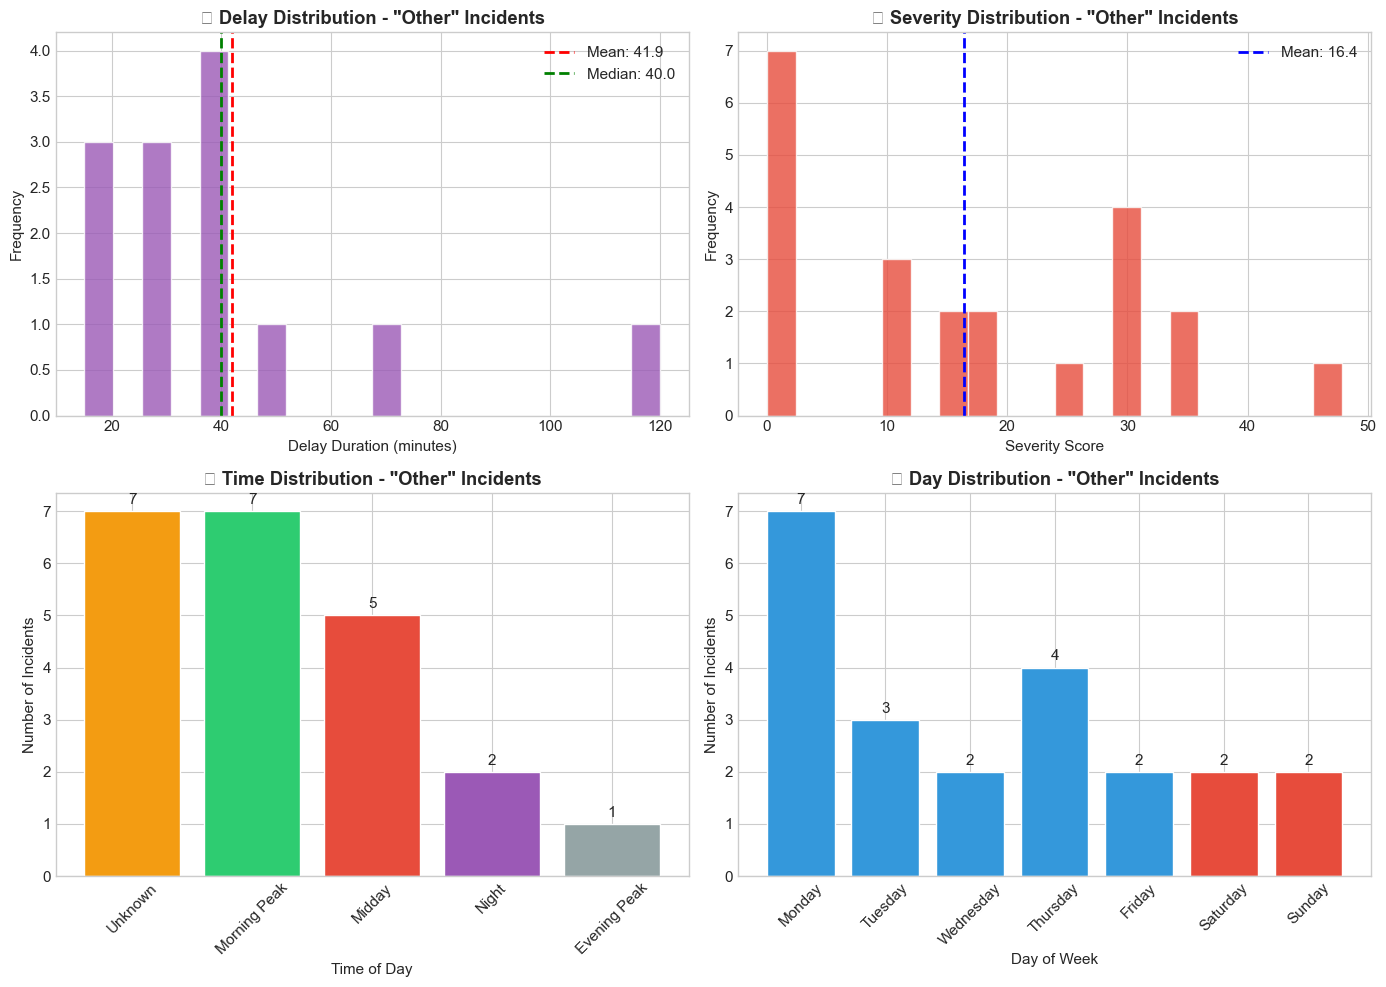

In [10]:
# Visualizations for "other" incidents
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Delay distribution
ax1 = axes[0, 0]
valid_delays = other_incidents['delay_duration_min'].dropna()
ax1.hist(valid_delays, bins=20, color='#9b59b6', edgecolor='white', alpha=0.8)
ax1.axvline(valid_delays.mean(), color='red', linestyle='--', linewidth=2, 
            label=f'Mean: {valid_delays.mean():.1f}')
ax1.axvline(valid_delays.median(), color='green', linestyle='--', linewidth=2, 
            label=f'Median: {valid_delays.median():.1f}')
ax1.set_xlabel('Delay Duration (minutes)')
ax1.set_ylabel('Frequency')
ax1.set_title('📊 Delay Distribution - "Other" Incidents', fontweight='bold')
ax1.legend()

# 2. Severity distribution
ax2 = axes[0, 1]
valid_severity = other_incidents['severity_score'].dropna()
ax2.hist(valid_severity, bins=20, color='#e74c3c', edgecolor='white', alpha=0.8)
ax2.axvline(valid_severity.mean(), color='blue', linestyle='--', linewidth=2, 
            label=f'Mean: {valid_severity.mean():.1f}')
ax2.set_xlabel('Severity Score')
ax2.set_ylabel('Frequency')
ax2.set_title('🎯 Severity Distribution - "Other" Incidents', fontweight='bold')
ax2.legend()

# 3. Time of day distribution
ax3 = axes[1, 0]
time_counts = other_incidents['time_of_day'].value_counts()
time_labels = [t.replace('_', ' ').title() for t in time_counts.index]
colors_time = ['#f39c12', '#2ecc71', '#e74c3c', '#9b59b6', '#95a5a6'][:len(time_counts)]
bars = ax3.bar(time_labels, time_counts.values, color=colors_time, edgecolor='white')
ax3.set_xlabel('Time of Day')
ax3.set_ylabel('Number of Incidents')
ax3.set_title('🕐 Time Distribution - "Other" Incidents', fontweight='bold')
ax3.tick_params(axis='x', rotation=45)
ax3.bar_label(bars, padding=3)

# 4. Day of week distribution
ax4 = axes[1, 1]
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_counts = other_incidents['day_of_week'].value_counts().reindex(day_order)
colors_day = ['#e74c3c' if d in ['Saturday', 'Sunday'] else '#3498db' for d in day_order]
bars2 = ax4.bar(day_order, day_counts.values, color=colors_day, edgecolor='white')
ax4.set_xlabel('Day of Week')
ax4.set_ylabel('Number of Incidents')
ax4.set_title('📅 Day Distribution - "Other" Incidents', fontweight='bold')
ax4.tick_params(axis='x', rotation=45)
ax4.bar_label(bars2, padding=3)

plt.tight_layout()
plt.savefig(DATA_DIR / 'viz_other_incidents_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

In [11]:
# Compare "other" with other incident types
comparison_df = df_faults.groupby('incident_type').agg({
    'delay_duration_min': ['mean', 'median', 'max'],
    'severity_score': ['mean', 'median'],
    'has_resolution': 'mean'
}).round(1)

comparison_df.columns = ['Delay Mean', 'Delay Median', 'Delay Max', 
                         'Severity Mean', 'Severity Median', 'Resolution %']
comparison_df['Resolution %'] = (comparison_df['Resolution %'] * 100).round(1)
comparison_df = comparison_df.sort_values('Delay Mean', ascending=False)

print("📊 Comparison: 'Other' vs All Incident Types")
print("=" * 70)
comparison_df

📊 Comparison: 'Other' vs All Incident Types


,Delay Mean,Delay Median,Delay Max,Severity Mean,Severity Median,Resolution %
incident_type,,,,,,
police_intervention,225.0,225.0,225.0,73.2,73.2,100.0
fire,66.7,25.0,160.0,30.4,28.0,100.0
trespasser,54.3,42.5,140.0,32.1,30.9,100.0
other,41.9,40.0,120.0,16.4,15.9,70.0
technical,36.4,30.0,85.0,29.0,28.3,100.0
weather,30.0,20.0,50.0,13.0,10.0,90.0
maintenance,23.7,30.0,40.0,7.0,0.0,70.0


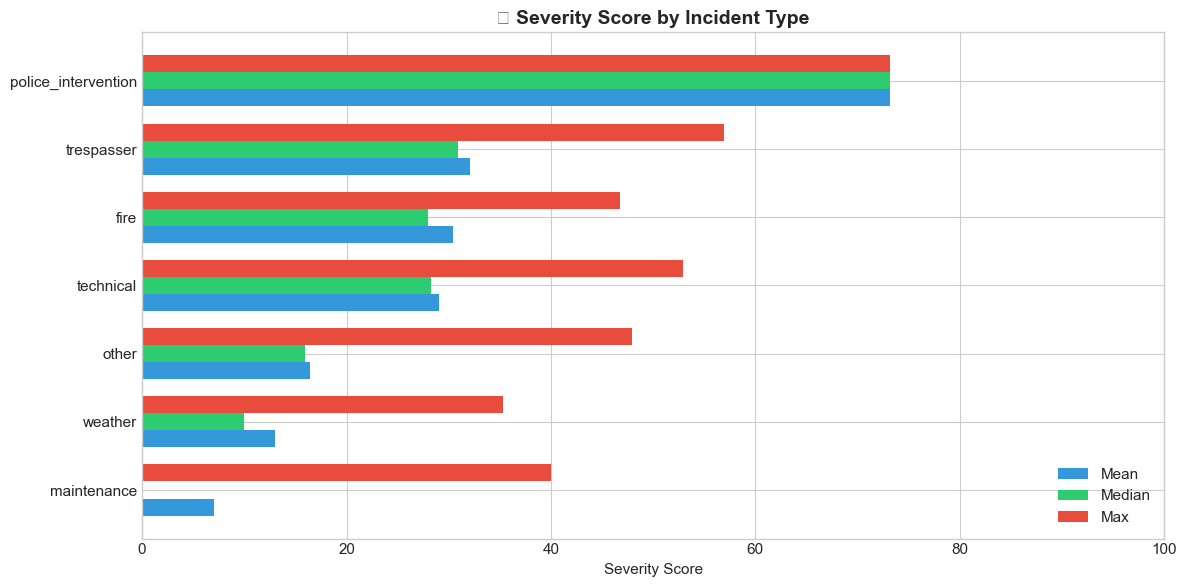

In [15]:
# Incident Type vs Severity
fig, ax = plt.subplots(figsize=(12, 6))

severity_by_type = df_faults.groupby('incident_type')['severity_score'].agg(['mean', 'median', 'max']).round(1)
severity_by_type = severity_by_type.sort_values('mean', ascending=True)

x = range(len(severity_by_type))
width = 0.25

bars1 = ax.barh([i - width for i in x], severity_by_type['mean'], width, label='Mean', color='#3498db')
bars2 = ax.barh([i for i in x], severity_by_type['median'], width, label='Median', color='#2ecc71')
bars3 = ax.barh([i + width for i in x], severity_by_type['max'], width, label='Max', color='#e74c3c')

ax.set_yticks(x)
ax.set_yticklabels(severity_by_type.index)
ax.set_xlabel('Severity Score')
ax.set_title('🎯 Severity Score by Incident Type', fontsize=14, fontweight='bold')
ax.legend(loc='lower right')
ax.set_xlim(0, 100)

plt.tight_layout()
plt.savefig(DATA_DIR / 'viz_severity_by_type.png', dpi=150, bbox_inches='tight')
plt.show()

---
## ⏱️ 3. Delay Duration Analysis

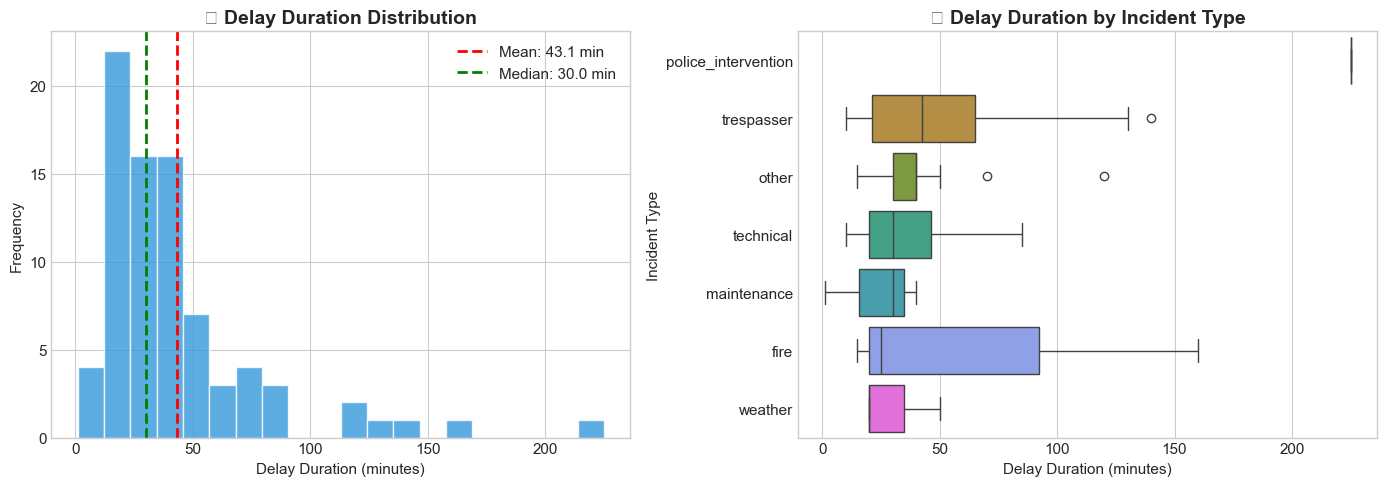

In [25]:
# Delay Duration Distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
valid_delays = df_faults['delay_duration_min'].dropna()
axes[0].hist(valid_delays, bins=20, color='#3498db', edgecolor='white', alpha=0.8)
axes[0].axvline(valid_delays.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {valid_delays.mean():.1f} min')
axes[0].axvline(valid_delays.median(), color='green', linestyle='--', linewidth=2, label=f'Median: {valid_delays.median():.1f} min')
axes[0].set_xlabel('Delay Duration (minutes)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('📊 Delay Duration Distribution', fontsize=14, fontweight='bold')
axes[0].legend()

# Box plot by incident type
df_plot = df_faults[df_faults['delay_duration_min'].notna()]
order = df_plot.groupby('incident_type')['delay_duration_min'].median().sort_values(ascending=False).index
sns.boxplot(data=df_plot, y='incident_type', x='delay_duration_min', order=order, ax=axes[1], palette='husl')
axes[1].set_xlabel('Delay Duration (minutes)')
axes[1].set_ylabel('Incident Type')
axes[1].set_title('📦 Delay Duration by Incident Type', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig(DATA_DIR / 'viz_delay_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

In [10]:
# Delay Duration Statistics Table
delay_stats = df_faults.groupby('incident_type')['delay_duration_min'].agg(
    ['count', 'mean', 'median', 'std', 'min', 'max']
).round(1)
delay_stats.columns = ['Count', 'Mean (min)', 'Median (min)', 'Std Dev', 'Min', 'Max']
delay_stats = delay_stats.sort_values('Mean (min)', ascending=False)

print("📊 Delay Duration Statistics by Incident Type:")
delay_stats

📊 Delay Duration Statistics by Incident Type:


,Count,Mean (min),Median (min),Std Dev,Min,Max
incident_type,,,,,,
police_intervention,1,225.0,225.0,NaN,225.0,225.0
fire,3,66.7,25.0,81.0,15.0,160.0
trespasser,14,54.3,42.5,44.3,10.0,140.0
other,13,41.9,40.0,27.5,15.0,120.0
technical,44,36.4,30.0,20.3,10.0,85.0
weather,3,30.0,20.0,17.3,20.0,50.0
maintenance,3,23.7,30.0,20.3,1.0,40.0


---
## 🕐 4. Temporal Patterns Analysis

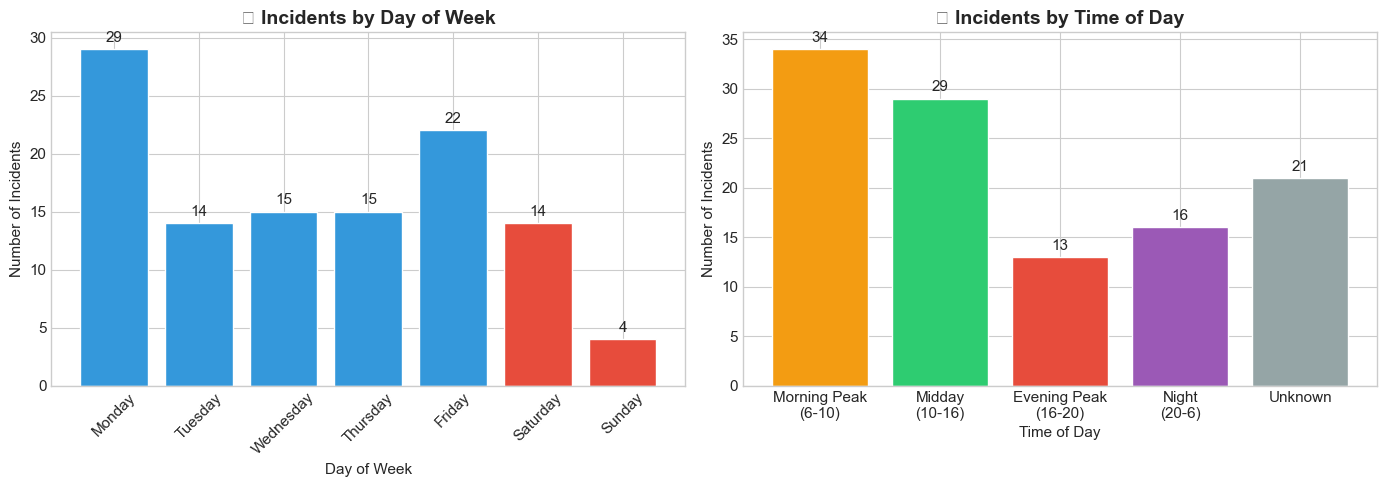

In [26]:
# Incidents by Day of Week
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Day of week distribution
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_counts = df_faults['day_of_week'].value_counts().reindex(day_order)
colors = ['#e74c3c' if d in ['Saturday', 'Sunday'] else '#3498db' for d in day_order]
bars = axes[0].bar(day_order, day_counts.values, color=colors, edgecolor='white')
axes[0].set_xlabel('Day of Week')
axes[0].set_ylabel('Number of Incidents')
axes[0].set_title('📅 Incidents by Day of Week', fontsize=14, fontweight='bold')
axes[0].tick_params(axis='x', rotation=45)
axes[0].bar_label(bars, padding=3)

# Time of day distribution
time_order = ['morning_peak', 'midday', 'evening_peak', 'night', 'unknown']
time_counts = df_faults['time_of_day'].value_counts().reindex(time_order).fillna(0)
time_labels = ['Morning Peak\n(6-10)', 'Midday\n(10-16)', 'Evening Peak\n(16-20)', 'Night\n(20-6)', 'Unknown']
colors_time = ['#f39c12', '#2ecc71', '#e74c3c', '#9b59b6', '#95a5a6']
bars2 = axes[1].bar(time_labels, time_counts.values, color=colors_time, edgecolor='white')
axes[1].set_xlabel('Time of Day')
axes[1].set_ylabel('Number of Incidents')
axes[1].set_title('🕐 Incidents by Time of Day', fontsize=14, fontweight='bold')
axes[1].bar_label(bars2, padding=3)

plt.tight_layout()
plt.savefig(DATA_DIR / 'viz_temporal_patterns.png', dpi=150, bbox_inches='tight')
plt.show()

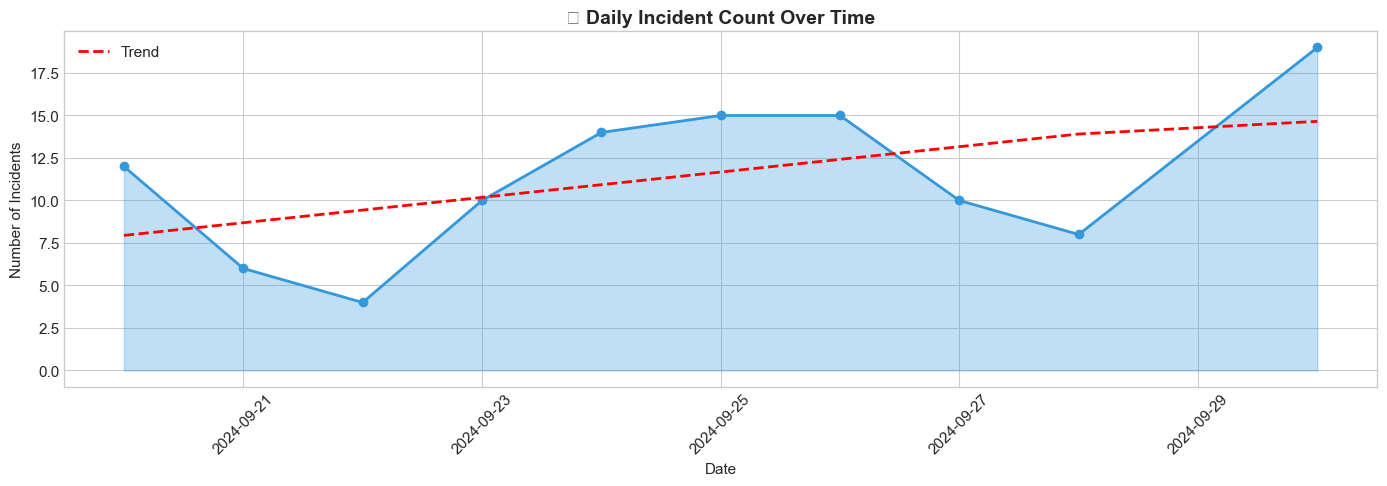

In [27]:
# Incidents over time (daily trend)
fig, ax = plt.subplots(figsize=(14, 5))

daily_incidents = df_faults.groupby('date').size()
ax.fill_between(daily_incidents.index, daily_incidents.values, alpha=0.3, color='#3498db')
ax.plot(daily_incidents.index, daily_incidents.values, marker='o', linewidth=2, color='#3498db')

# Add trend line
z = np.polyfit(range(len(daily_incidents)), daily_incidents.values, 1)
p = np.poly1d(z)
ax.plot(daily_incidents.index, p(range(len(daily_incidents))), '--', color='red', linewidth=2, label='Trend')

ax.set_xlabel('Date')
ax.set_ylabel('Number of Incidents')
ax.set_title('📈 Daily Incident Count Over Time', fontsize=14, fontweight='bold')
ax.legend()
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig(DATA_DIR / 'viz_daily_trend.png', dpi=150, bbox_inches='tight')
plt.show()

---
## 🔧 5. Resolution Analysis

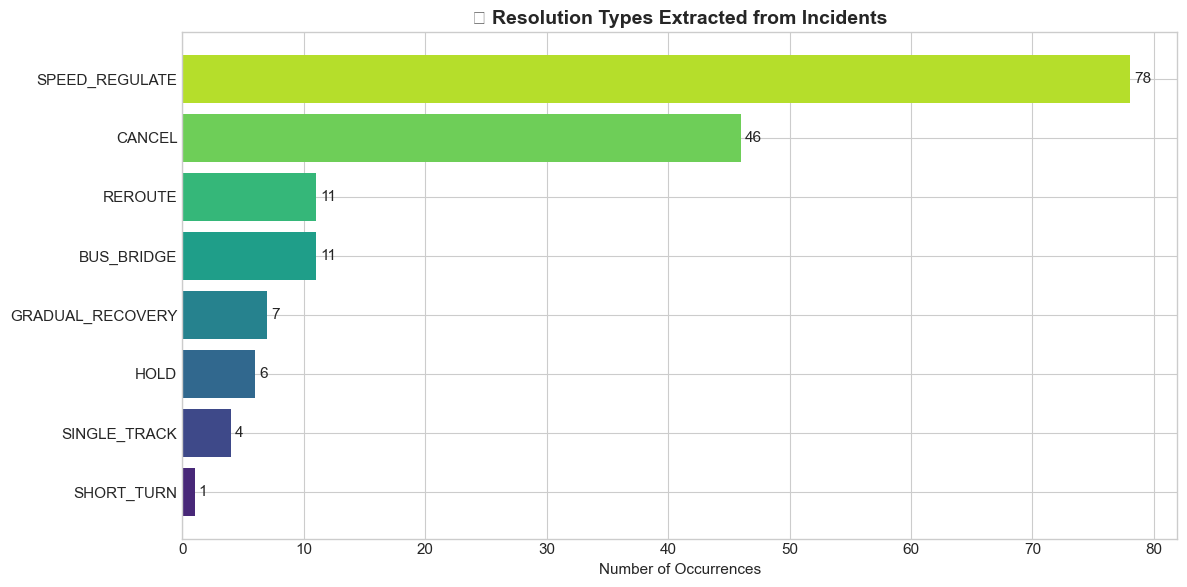


📋 Resolution Type Breakdown:
  SPEED_REGULATE: 78
  CANCEL: 46
  REROUTE: 11
  BUS_BRIDGE: 11
  GRADUAL_RECOVERY: 7
  HOLD: 6
  SINGLE_TRACK: 4
  SHORT_TURN: 1


In [28]:
# Parse resolution types
from collections import Counter

all_resolutions = []
for res_str in df_faults['resolution_types'].dropna():
    if res_str and res_str != '':
        res_list = str(res_str).split('|')
        all_resolutions.extend([r.strip() for r in res_list if r.strip()])

resolution_counts = Counter(all_resolutions)
resolution_df = pd.DataFrame.from_dict(resolution_counts, orient='index', columns=['count'])
resolution_df = resolution_df.sort_values('count', ascending=True)

# Plot
fig, ax = plt.subplots(figsize=(12, 6))
colors = sns.color_palette('viridis', len(resolution_df))
bars = ax.barh(resolution_df.index, resolution_df['count'], color=colors)
ax.set_xlabel('Number of Occurrences')
ax.set_title('🔧 Resolution Types Extracted from Incidents', fontsize=14, fontweight='bold')
ax.bar_label(bars, padding=3)

plt.tight_layout()
plt.savefig(DATA_DIR / 'viz_resolution_types.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n📋 Resolution Type Breakdown:")
for res, count in sorted(resolution_counts.items(), key=lambda x: -x[1]):
    print(f"  {res}: {count}")

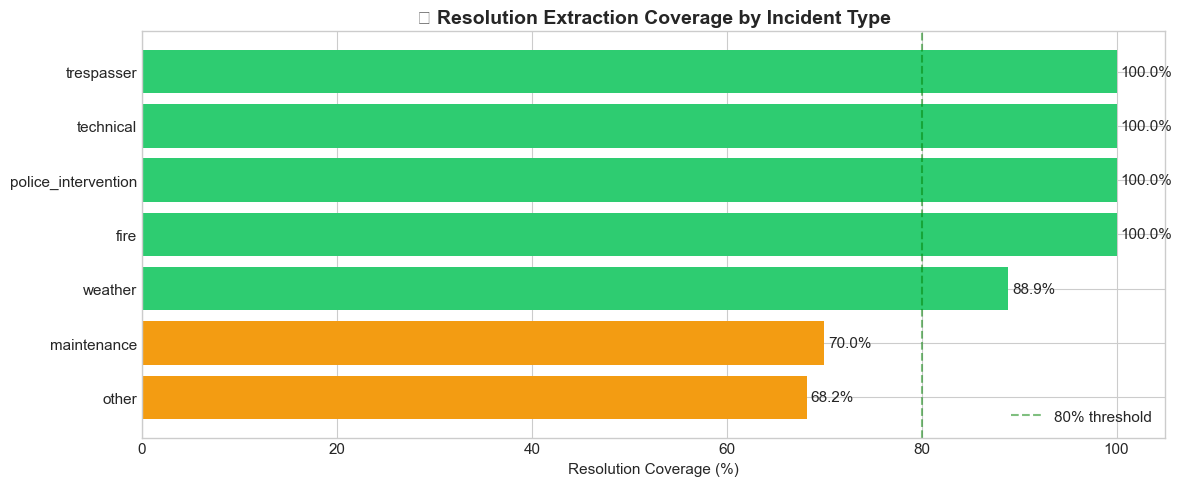

In [16]:
# Resolution Coverage by Incident Type
resolution_coverage = df_faults.groupby('incident_type')['has_resolution'].agg(['sum', 'count'])
resolution_coverage['coverage_pct'] = (resolution_coverage['sum'] / resolution_coverage['count'] * 100).round(1)
resolution_coverage = resolution_coverage.sort_values('coverage_pct', ascending=True)

fig, ax = plt.subplots(figsize=(12, 5))
colors = ['#2ecc71' if p >= 80 else '#f39c12' if p >= 50 else '#e74c3c' 
          for p in resolution_coverage['coverage_pct']]
bars = ax.barh(resolution_coverage.index, resolution_coverage['coverage_pct'], color=colors)
ax.set_xlabel('Resolution Coverage (%)')
ax.set_title('✅ Resolution Extraction Coverage by Incident Type', fontsize=14, fontweight='bold')
ax.axvline(80, color='green', linestyle='--', alpha=0.5, label='80% threshold')
ax.set_xlim(0, 105)
ax.bar_label(bars, fmt='%.1f%%', padding=3)
ax.legend()

plt.tight_layout()
plt.savefig(DATA_DIR / 'viz_resolution_coverage.png', dpi=150, bbox_inches='tight')
plt.show()

---
## 🗺️ 6. Heatmaps & Correlations

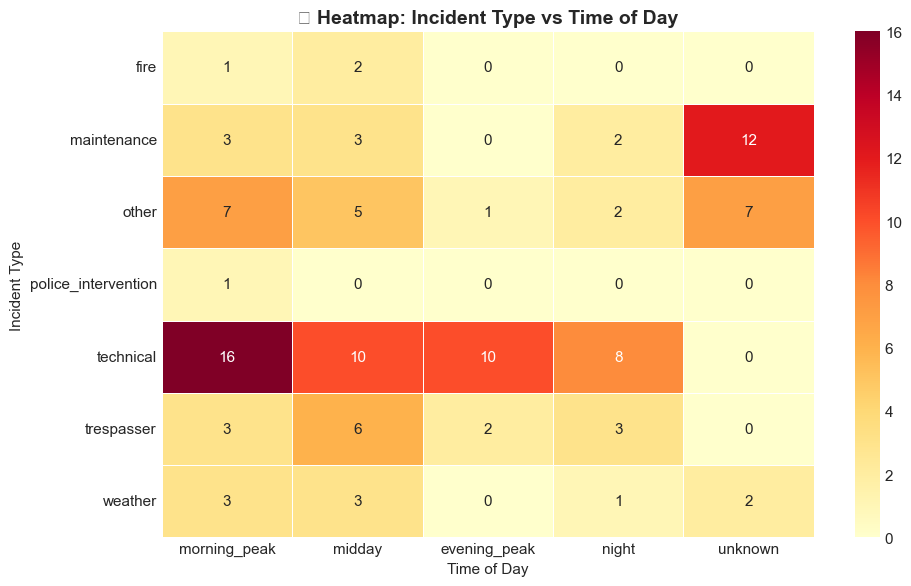

In [29]:
# Incident Type vs Time of Day Heatmap
pivot_time = pd.crosstab(df_faults['incident_type'], df_faults['time_of_day'])
time_order = ['morning_peak', 'midday', 'evening_peak', 'night', 'unknown']
pivot_time = pivot_time.reindex(columns=[c for c in time_order if c in pivot_time.columns])

fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(pivot_time, annot=True, fmt='d', cmap='YlOrRd', ax=ax, linewidths=0.5)
ax.set_title('🔥 Heatmap: Incident Type vs Time of Day', fontsize=14, fontweight='bold')
ax.set_xlabel('Time of Day')
ax.set_ylabel('Incident Type')

plt.tight_layout()
plt.savefig(DATA_DIR / 'viz_heatmap_type_time.png', dpi=150, bbox_inches='tight')
plt.show()

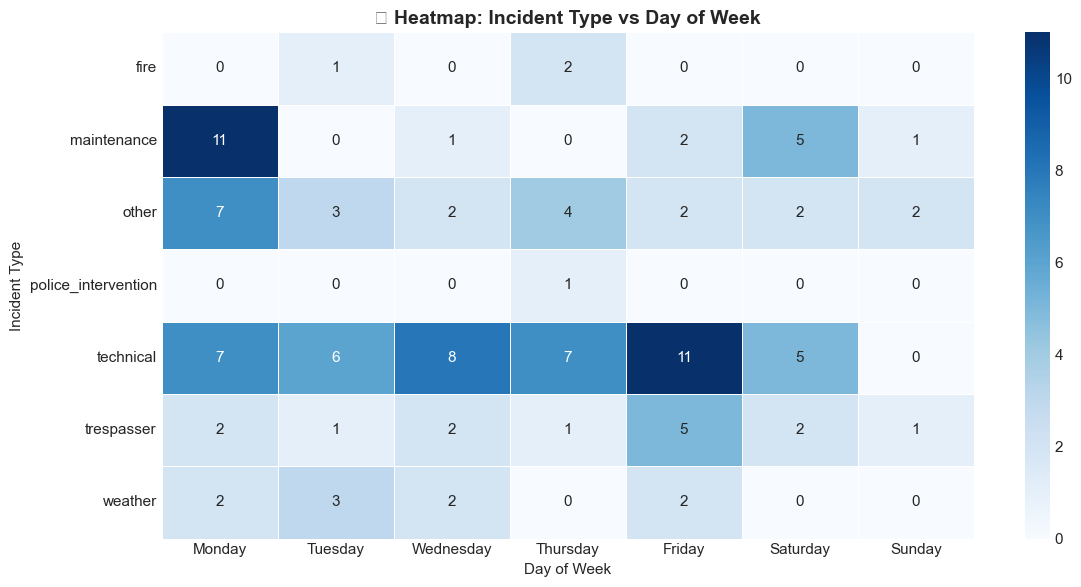

In [30]:
# Incident Type vs Day of Week Heatmap
pivot_day = pd.crosstab(df_faults['incident_type'], df_faults['day_of_week'])
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pivot_day = pivot_day.reindex(columns=[c for c in day_order if c in pivot_day.columns])

fig, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(pivot_day, annot=True, fmt='d', cmap='Blues', ax=ax, linewidths=0.5)
ax.set_title('🔥 Heatmap: Incident Type vs Day of Week', fontsize=14, fontweight='bold')
ax.set_xlabel('Day of Week')
ax.set_ylabel('Incident Type')

plt.tight_layout()
plt.savefig(DATA_DIR / 'viz_heatmap_type_day.png', dpi=150, bbox_inches='tight')
plt.show()

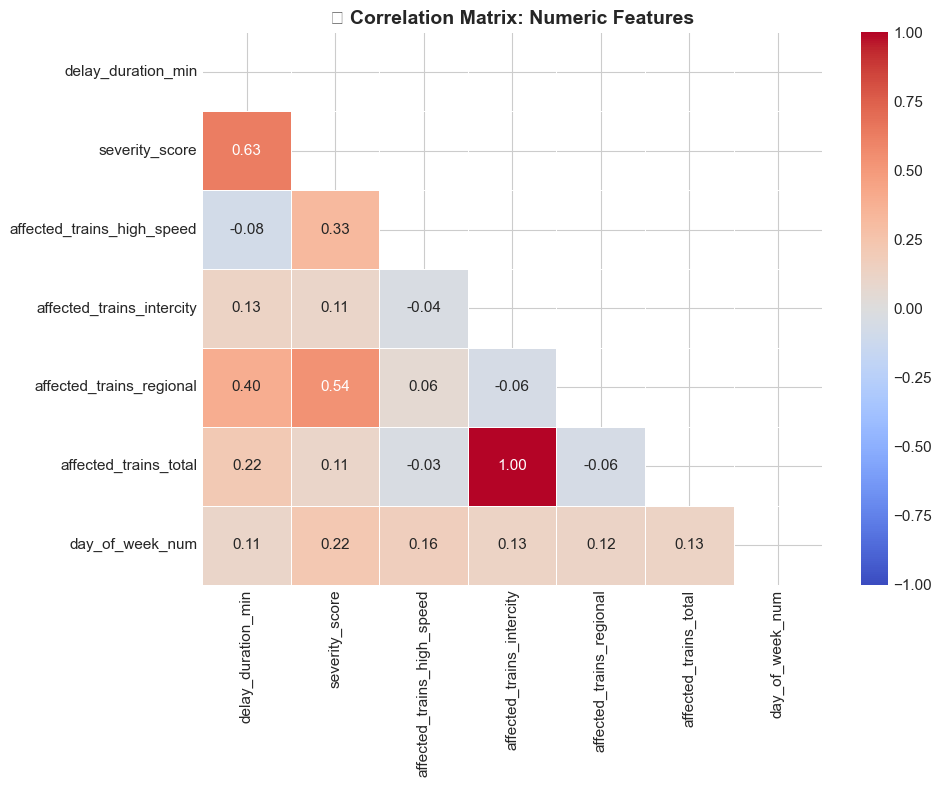

In [31]:
# Correlation Matrix for Numeric Features
numeric_cols = ['delay_duration_min', 'severity_score', 'affected_trains_high_speed',
                'affected_trains_intercity', 'affected_trains_regional', 'affected_trains_total',
                'day_of_week_num']
numeric_cols = [c for c in numeric_cols if c in df_faults.columns]

corr_matrix = df_faults[numeric_cols].corr()

fig, ax = plt.subplots(figsize=(10, 8))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', 
            ax=ax, linewidths=0.5, center=0, vmin=-1, vmax=1)
ax.set_title('🔗 Correlation Matrix: Numeric Features', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig(DATA_DIR / 'viz_correlation_matrix.png', dpi=150, bbox_inches='tight')
plt.show()

---
## 🚉 7. Station & Network Analysis

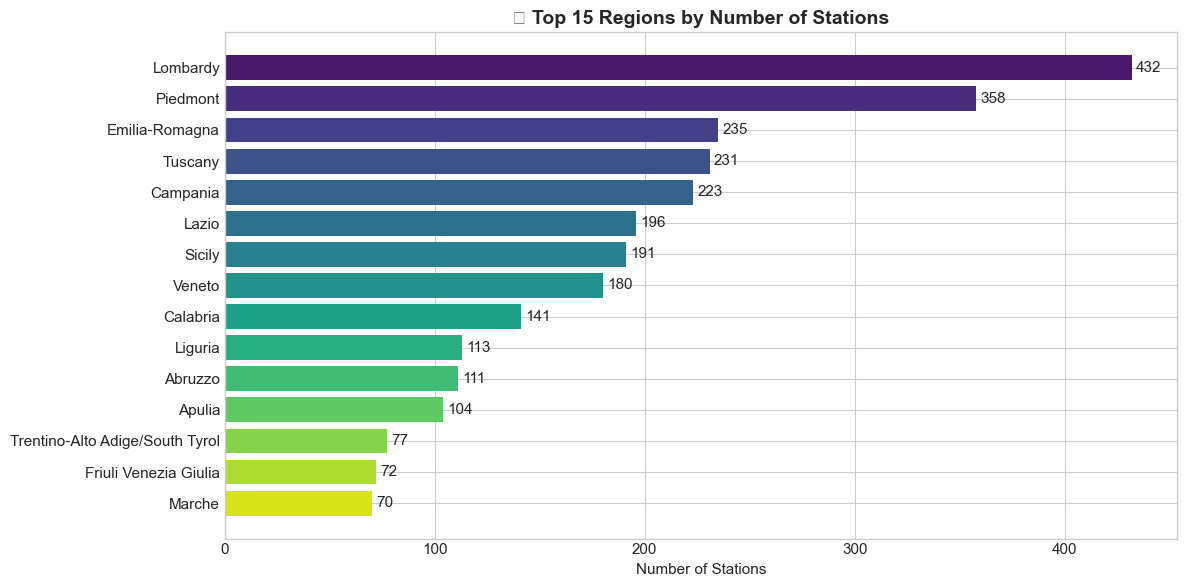

In [32]:
# Stations by Region
if 'region_name' in df_stations.columns:
    region_counts = df_stations['region_name'].value_counts().head(15)
    
    fig, ax = plt.subplots(figsize=(12, 6))
    colors = sns.color_palette('viridis', len(region_counts))
    bars = ax.barh(region_counts.index[::-1], region_counts.values[::-1], color=colors[::-1])
    ax.set_xlabel('Number of Stations')
    ax.set_title('🚉 Top 15 Regions by Number of Stations', fontsize=14, fontweight='bold')
    ax.bar_label(bars, padding=3)
    
    plt.tight_layout()
    plt.savefig(DATA_DIR / 'viz_stations_by_region.png', dpi=150, bbox_inches='tight')
    plt.show()
else:
    print("Region information not available in station data")

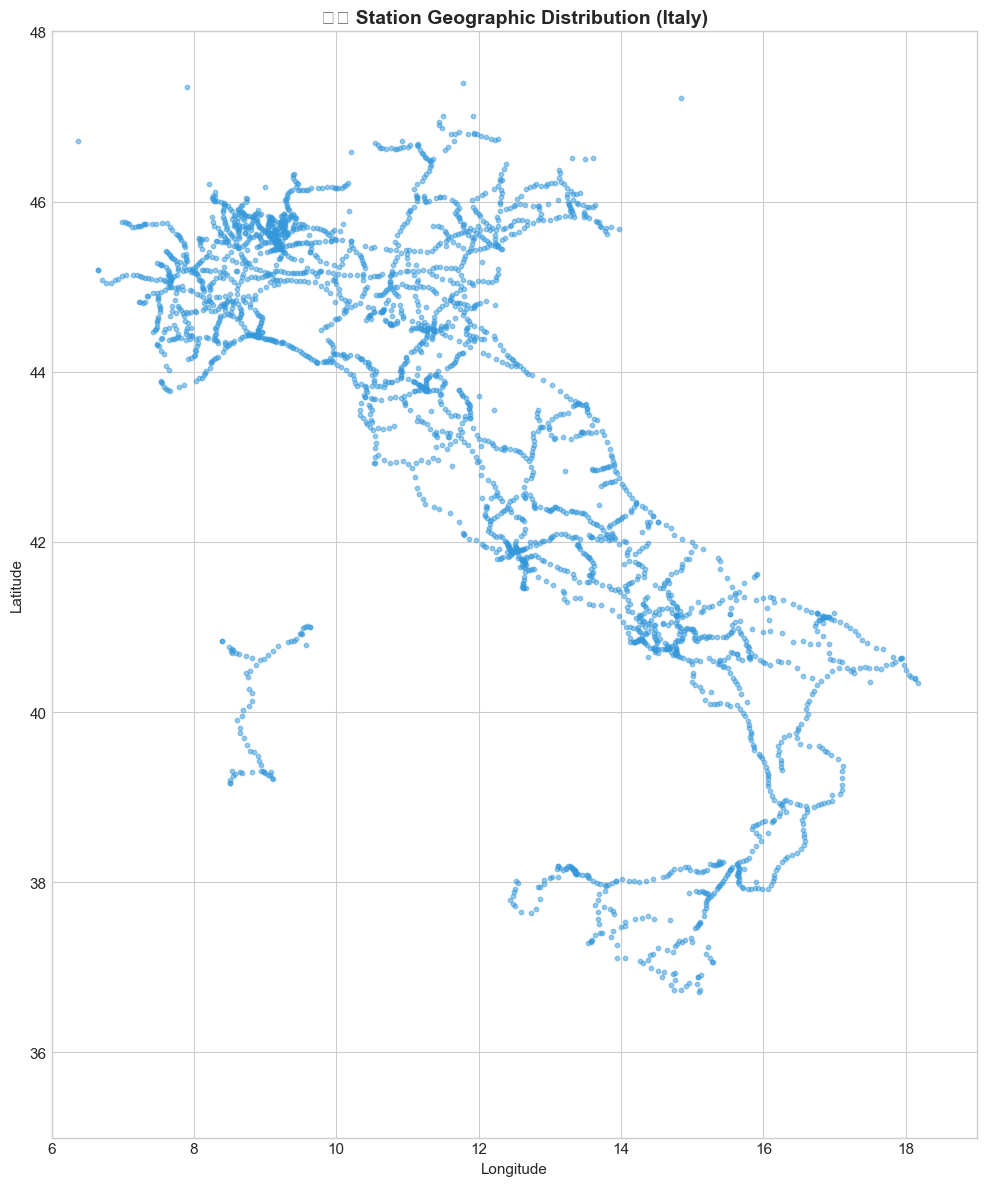


📍 Geographic Coverage:
   Latitude: 36.71° to 47.39°
   Longitude: 6.37° to 18.17°


In [33]:
# Station Geographic Distribution (if lat/lon available)
if 'lat' in df_stations.columns and 'lon' in df_stations.columns:
    fig, ax = plt.subplots(figsize=(10, 12))
    
    scatter = ax.scatter(df_stations['lon'], df_stations['lat'], 
                        alpha=0.5, s=10, c='#3498db')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title('🗺️ Station Geographic Distribution (Italy)', fontsize=14, fontweight='bold')
    ax.set_xlim(6, 19)
    ax.set_ylim(35, 48)
    
    plt.tight_layout()
    plt.savefig(DATA_DIR / 'viz_station_map.png', dpi=150, bbox_inches='tight')
    plt.show()
    
    print(f"\n📍 Geographic Coverage:")
    print(f"   Latitude: {df_stations['lat'].min():.2f}° to {df_stations['lat'].max():.2f}°")
    print(f"   Longitude: {df_stations['lon'].min():.2f}° to {df_stations['lon'].max():.2f}°")

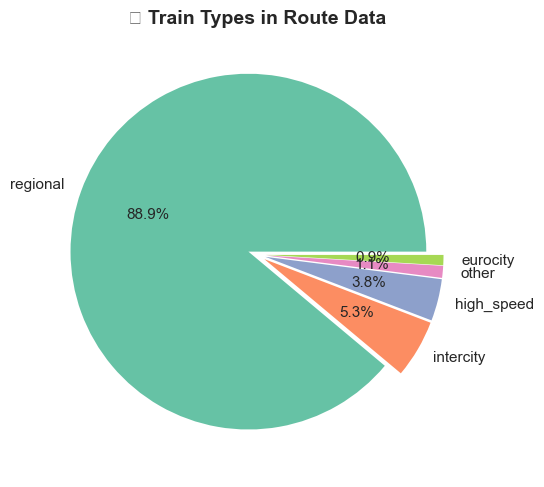

In [22]:
# Train Types in Route Data
if 'train_type' in df_mileage.columns:
    train_type_counts = df_mileage['train_type'].value_counts()
    
    fig, ax = plt.subplots(figsize=(10, 5))
    colors = sns.color_palette('Set2', len(train_type_counts))
    ax.pie(train_type_counts.values, labels=train_type_counts.index, autopct='%1.1f%%',
           colors=colors, explode=[0.05]*len(train_type_counts))
    ax.set_title('🚆 Train Types in Route Data', fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.savefig(DATA_DIR / 'viz_train_types.png', dpi=150, bbox_inches='tight')
    plt.show()

---
## 🚂 8. Operation Data Analysis

In [23]:
# Operation Data Summary
print("=" * 60)
print("OPERATION DATA SUMMARY")
print("=" * 60)
print(f"\n📊 Sample Size: {len(df_operations):,} records")
print(f"\n📋 Available Columns:")
for col in df_operations.columns:
    non_null = df_operations[col].notna().sum()
    pct = non_null / len(df_operations) * 100
    print(f"   {col}: {non_null:,} ({pct:.1f}% non-null)")

OPERATION DATA SUMMARY

📊 Sample Size: 100,000 records

📋 Available Columns:
   train_class: 100,000 (100.0% non-null)
   train_number: 100,000 (100.0% non-null)
   first_station_name: 100,000 (100.0% non-null)
   final_station_name: 100,000 (100.0% non-null)
   scheduled_departure_station: 275 (0.3% non-null)
   scheduled_arrival_station: 275 (0.3% non-null)
   fault_describe: 275 (0.3% non-null)
   initial_delay: 100,000 (100.0% non-null)
   final_delay: 100,000 (100.0% non-null)
   date: 100,000 (100.0% non-null)
   train_id: 100,000 (100.0% non-null)
   station_name: 100,000 (100.0% non-null)
   arrival_delay: 100,000 (100.0% non-null)
   departure_delay: 100,000 (100.0% non-null)
   scheduled_arrival_time: 100,000 (100.0% non-null)
   scheduled_departure_time: 100,000 (100.0% non-null)
   next_day: 100,000 (100.0% non-null)
   station_order: 100,000 (100.0% non-null)
   scheduled_running_time: 100,000 (100.0% non-null)
   scheduled_stop_time: 100,000 (100.0% non-null)
   actual_ar

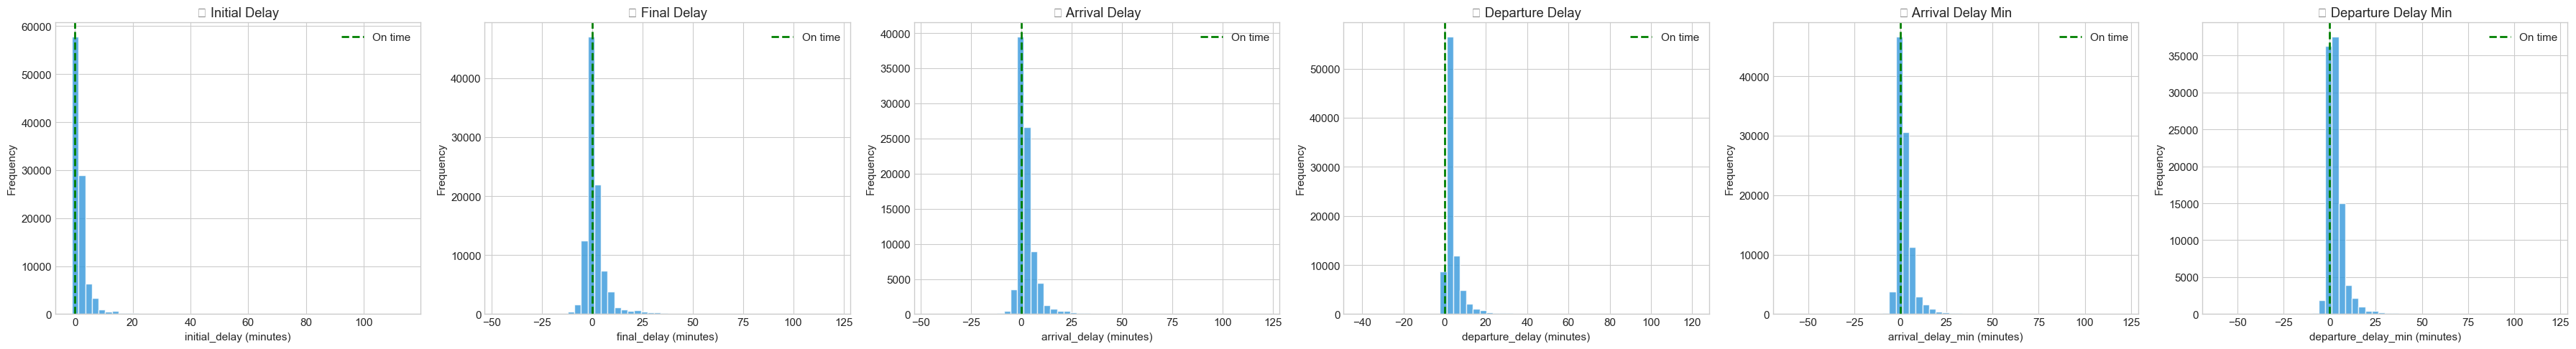

In [37]:
# Delay Distribution in Operations (if available)
delay_cols = [c for c in df_operations.columns if 'delay' in c.lower()]

if delay_cols:
    fig, axes = plt.subplots(1, len(delay_cols), figsize=(6*len(delay_cols), 5))
    if len(delay_cols) == 1:
        axes = [axes]
    
    for ax, col in zip(axes, delay_cols):
        # Convert to numeric first (handles string data)
        numeric_data = pd.to_numeric(df_operations[col], errors='coerce')
        valid_data = numeric_data.dropna()
        if len(valid_data) > 0:
            # Clip extreme values for visualization
            clipped = valid_data.clip(-60, 120)
            ax.hist(clipped, bins=50, color='#3498db', edgecolor='white', alpha=0.8)
            ax.axvline(0, color='green', linestyle='--', linewidth=2, label='On time')
            ax.set_xlabel(f'{col} (minutes)')
            ax.set_ylabel('Frequency')
            ax.set_title(f'📊 {col.replace("_", " ").title()}')
            ax.legend()
    
    plt.tight_layout()
    plt.savefig(DATA_DIR / 'viz_operation_delays.png', dpi=150, bbox_inches='tight')
    plt.show()
else:
    print("No delay columns found in operation data")

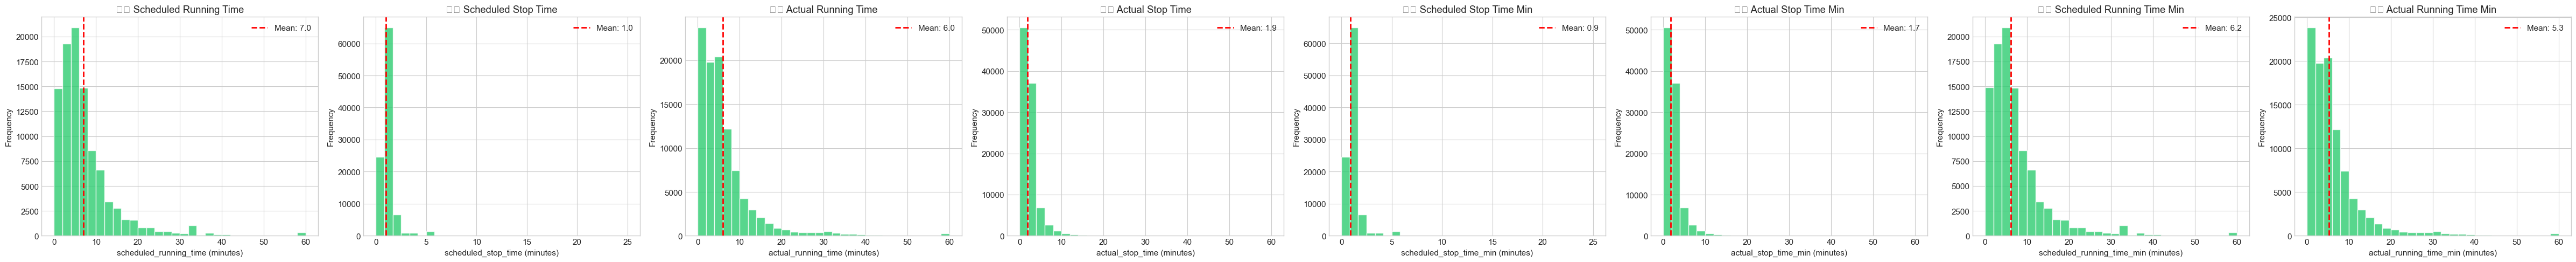

In [40]:
# Running Time and Stop Time Analysis (if available)
time_cols = [c for c in df_operations.columns if 'running_time' in c or 'stop_time' in c]

if time_cols:
    fig, axes = plt.subplots(1, len(time_cols), figsize=(6*len(time_cols), 5))
    if len(time_cols) == 1:
        axes = [axes]
    
    for ax, col in zip(axes, time_cols):
        # Convert to numeric, coercing errors to NaN
        numeric_data = pd.to_numeric(df_operations[col], errors='coerce')
        valid_data = numeric_data.dropna()
        if len(valid_data) > 0:
            # Clip for visualization
            clipped = valid_data.clip(0, 60)
            ax.hist(clipped, bins=30, color='#2ecc71', edgecolor='white', alpha=0.8)
            ax.axvline(valid_data.mean(), color='red', linestyle='--', 
                      linewidth=2, label=f'Mean: {valid_data.mean():.1f}')
            ax.set_xlabel(f'{col} (minutes)')
            ax.set_ylabel('Frequency')
            ax.set_title(f'⏱️ {col.replace("_", " ").title()}')
            ax.legend()
    
    plt.tight_layout()
    plt.savefig(DATA_DIR / 'viz_operation_times.png', dpi=150, bbox_inches='tight')
    plt.show()
else:
    print("No time columns found in operation data")

---
## 📊 9. Final Summary Report

In [39]:
# Generate Final Summary Report
print("="*70)
print("📊 AI RAIL NETWORK BRAIN - DATA EXPLORATION SUMMARY REPORT")
print("="*70)

print("\n📁 DATASET OVERVIEW")
print("-"*50)
print(f"  Fault/Incident Records:     {len(df_faults):>10,}")
print(f"  Station Records:            {len(df_stations):>10,}")
print(f"  Route Segment Records:      {len(df_mileage):>10,}")
print(f"  Operation Records (sample): {len(df_operations):>10,}")

print("\n📅 TIME COVERAGE")
print("-"*50)
print(f"  Date Range: {df_faults['date'].min().date()} to {df_faults['date'].max().date()}")
print(f"  Days Covered: {(df_faults['date'].max() - df_faults['date'].min()).days + 1}")

print("\n🔥 INCIDENT ANALYSIS")
print("-"*50)
print(f"  Most Common Type: {df_faults['incident_type'].mode()[0]}")
print(f"  Average Delay: {df_faults['delay_duration_min'].mean():.1f} minutes")
print(f"  Max Delay: {df_faults['delay_duration_min'].max():.0f} minutes")
print(f"  Average Severity: {df_faults['severity_score'].mean():.1f}/100")

print("\n🔧 RESOLUTION ANALYSIS")
print("-"*50)
print(f"  Resolution Coverage: {df_faults['has_resolution'].mean()*100:.1f}%")
if resolution_counts:
    top_resolution = max(resolution_counts, key=resolution_counts.get)
    print(f"  Most Common Resolution: {top_resolution}")
print(f"  Unique Resolution Types: {len(resolution_counts)}")

print("\n⏰ TEMPORAL PATTERNS")
print("-"*50)
busiest_day = df_faults['day_of_week'].mode()[0]
busiest_time = df_faults['time_of_day'].mode()[0]
print(f"  Busiest Day: {busiest_day}")
print(f"  Busiest Time: {busiest_time.replace('_', ' ').title()}")
print(f"  Weekend Incidents: {df_faults['is_weekend'].sum()} ({df_faults['is_weekend'].mean()*100:.1f}%)")

print("\n🚉 NETWORK COVERAGE")
print("-"*50)
print(f"  Total Stations: {len(df_stations):,}")
if 'region_name' in df_stations.columns:
    print(f"  Regions Covered: {df_stations['region_name'].nunique()}")
print(f"  Unique Lines Affected: {df_faults['line_normalized'].nunique()}")

print("\n" + "="*70)
print("✅ Report generated successfully!")
print(f"📁 Visualizations saved to: {DATA_DIR}")
print("="*70)

📊 AI RAIL NETWORK BRAIN - DATA EXPLORATION SUMMARY REPORT

📁 DATASET OVERVIEW
--------------------------------------------------
  Fault/Incident Records:            113
  Station Records:                 2,975
  Route Segment Records:          12,173
  Operation Records (sample):    100,000

📅 TIME COVERAGE
--------------------------------------------------
  Date Range: 2024-09-20 to 2024-09-30
  Days Covered: 11

🔥 INCIDENT ANALYSIS
--------------------------------------------------
  Most Common Type: technical
  Average Delay: 43.1 minutes
  Max Delay: 225 minutes
  Average Severity: 22.2/100

🔧 RESOLUTION ANALYSIS
--------------------------------------------------
  Resolution Coverage: 87.6%
  Most Common Resolution: SPEED_REGULATE
  Unique Resolution Types: 8

⏰ TEMPORAL PATTERNS
--------------------------------------------------
  Busiest Day: Monday
  Busiest Time: Morning Peak
  Weekend Incidents: 18 (15.9%)

🚉 NETWORK COVERAGE
-----------------------------------------------

In [41]:
# List all generated visualization files
import os

print("📊 Generated Visualization Files:")
print("-"*50)
for f in sorted(DATA_DIR.glob('viz_*.png')):
    size_kb = os.path.getsize(f) / 1024
    print(f"  ✅ {f.name} ({size_kb:.1f} KB)")

📊 Generated Visualization Files:
--------------------------------------------------
  ✅ viz_correlation_matrix.png (105.7 KB)
  ✅ viz_daily_trend.png (78.8 KB)
  ✅ viz_delay_distribution.png (60.2 KB)
  ✅ viz_heatmap_type_day.png (59.4 KB)
  ✅ viz_heatmap_type_time.png (56.7 KB)
  ✅ viz_incident_types.png (93.6 KB)
  ✅ viz_operation_delays.png (130.0 KB)
  ✅ viz_operation_times.png (139.2 KB)
  ✅ viz_resolution_coverage.png (57.0 KB)
  ✅ viz_resolution_types.png (48.3 KB)
  ✅ viz_severity_by_type.png (41.3 KB)
  ✅ viz_station_map.png (258.9 KB)
  ✅ viz_stations_by_region.png (67.5 KB)
  ✅ viz_temporal_patterns.png (75.1 KB)
  ✅ viz_train_types.png (46.9 KB)
